sep stopped being maintained from 2022 up until very recently, as such it does not support my versions of python and numpy so i'm using sep-pjw

In [8]:
import numpy as np
import sep_pjw as sep

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = [10.,8.]


read in data

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


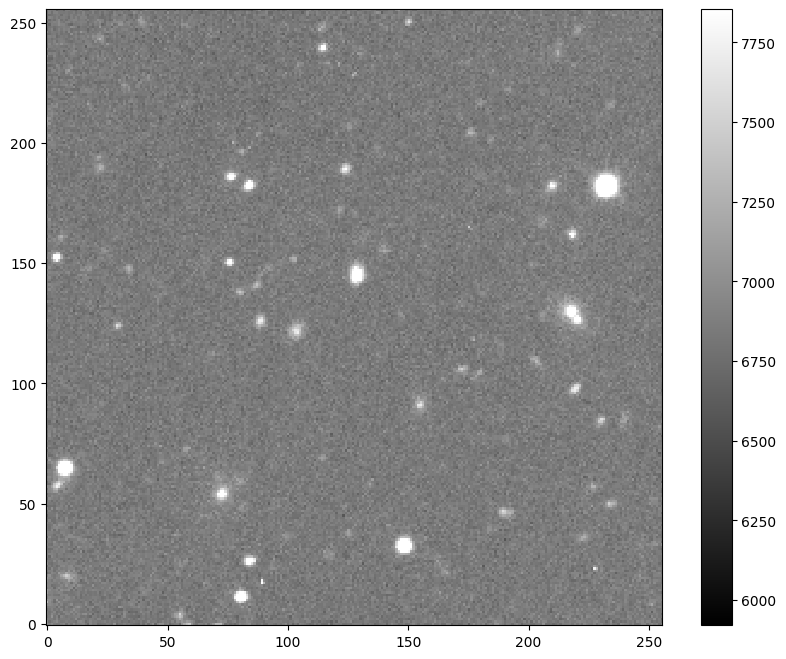

In [24]:
data = fits.getdata("image.fits")


m,s = np.mean(data), np.std(data)
plt.imshow(data,interpolation='nearest',cmap='gray',vmin=m-s,vmax=m+s,origin='lower')
plt.colorbar()

plt.savefig("fig1.png")

remove background

In [11]:
bkg = sep.Background(data)

eval background as 2d array with same size as image.fits

In [ ]:

print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [13]:
bkg_image = bkg.back()

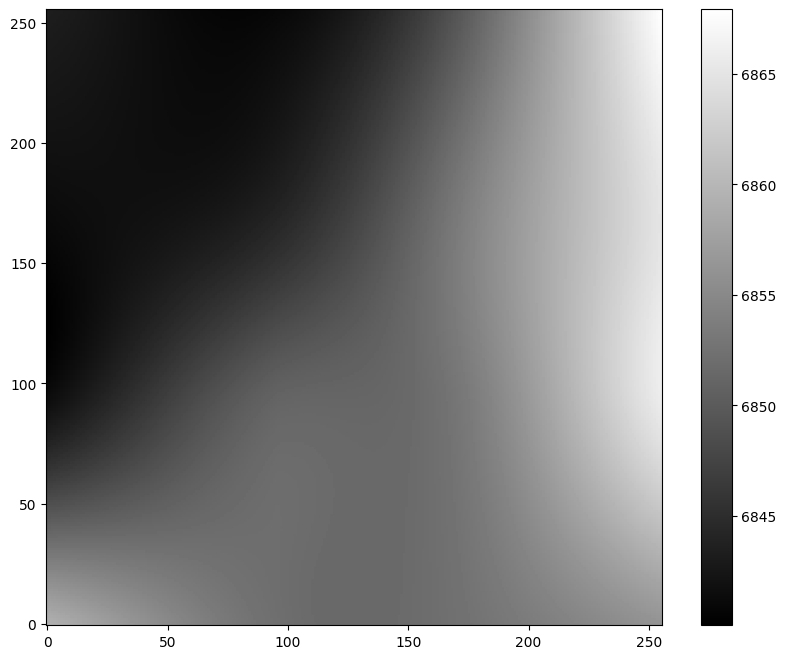

In [25]:
plt.imshow(bkg_image,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar()

plt.savefig("fig2.png")

eval background noise as 2d array

In [ ]:

bkg_rms = bkg.rms()

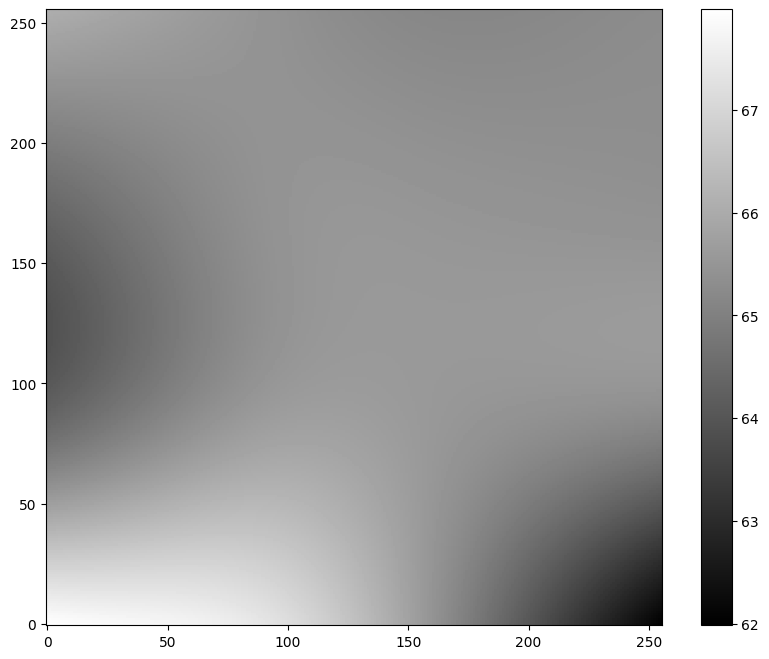

In [26]:
plt.imshow(bkg_rms,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar()
plt.savefig("fig3.png")

subtract background

I guess the previous cells are all things that can be done with bkg, but arent necessary

In [ ]:
data_sub = data - bkg

object detection

In [18]:
objects = sep.extract(data_sub,1.5,err=bkg.globalrms)

In [19]:
len(objects)

69

Go through all detected objects and give it a red ellipse

In [ ]:
from matplotlib.patches import Ellipse

fig,ax = plt.subplots()
m,s, = np.mean(data_sub),np.std(data_sub)
im = ax.imshow(data_sub,interpolation='nearest',cmap='gray',
               vmin=m-s,vmax=m+s,origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

    plt.savefig("fig4.png")

available fields

In [ ]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

flux,fluxerr,flag are 1d arrays w/ one entry per object

In [ ]:
flux,fluxerr,flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,gain=1.)


In [23]:
for i in range(10):
    print('object {:d}: flux = {:f} +/- {:f}'.format(i,flux[i],fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
